In [1]:
import pandas as pd
import ktest
from ktest.tester import Ktest

# Ktest: two-sample kernel tests for large datasets
## Functionalities demonstrated on real data

Loading data:

In [2]:
data = pd.read_csv('v5_data/RTqPCR_reversion_logcentered.csv', index_col=0)

Constructing metadata and instantiating Ktest:

In [3]:
meta = pd.Series(data = pd.Series(data.index).apply(lambda x : x.split(sep='.')[1]))
meta.index = data.index
kt_1 = Ktest(data=data, metadata=meta, sample_names=['48HREV','48HDIFF'])
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
not computed, run ktest.test.
kFDA:
not computed, run ktest.test.


Performing multivariate test (default setting):

In [4]:
kt_1.test()

- Computing kFDA statistic
- Computing asymptotic p-values


In [5]:
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
not computed, run ktest.test.
kFDA:
Truncation 1: 117.43187874099583. P-value:
asymptotic: 2.308957467091283e-27, permutation: not computed.
Truncation 2: 159.6677787277536. P-value:
asymptotic: 2.130994753054654e-35, permutation: not computed.
Truncation 3: 208.18560203300797. P-value:
asymptotic: 7.183028439477411e-45, permutation: not computed.
Truncation 4: 415.74023080466685. P-value:
asymptotic: 1.1041605715436795e-88, permutation: not computed.
Truncation 5: 468.5286504757469. P-value:
asymptotic: 4.943073823136489e-99, permutation: not computed.


As a result, kFDA statistic with assiciated asymptotic p-values for each truncation were calculated. The latter are stored respectively in attributes `kfdat_statistic` and `kfda_pval_asymp`:

In [6]:
kt_1.kfda_statistic

1       117.431879
2       159.667779
3       208.185602
4       415.740231
5       468.528650
          ...     
335    5505.910998
336    5508.706471
337    5943.961905
338    6332.466341
339    7616.844689
Length: 339, dtype: float64

In [7]:
kt_1.kfda_pval_asymp

1      2.308957e-27
2      2.130995e-35
3      7.183028e-45
4      1.104161e-88
5      4.943074e-99
           ...     
335    0.000000e+00
336    0.000000e+00
337    0.000000e+00
338    0.000000e+00
339    0.000000e+00
Length: 339, dtype: float64

### Options: permutation test and Nystrom approximation

Alongside with asymptotic p-values, permutation-based p-values can be calcultated and stored in `kfda_pval_perm`:

In [10]:
kt_1.test(permutation=True, n_permutations=int(1e3))

- Computing kFDA statistic
- Performing permutations to compute p-values:


100%|███████████████████████████████████████| 1000/1000 [00:45<00:00, 22.07it/s]


In [11]:
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
not computed, run ktest.test.
kFDA:
Truncation 1: 117.43187874099617. P-value:
asymptotic: 2.3089574670908834e-27, permutation: 0.0.
Truncation 2: 159.66777872775367. P-value:
asymptotic: 2.1309947530545922e-35, permutation: 0.0.
Truncation 3: 208.18560203300848. P-value:
asymptotic: 7.18302843947566e-45, permutation: 0.0.
Truncation 4: 415.74023080466327. P-value:
asymptotic: 1.1041605715456346e-88, permutation: 0.0.
Truncation 5: 468.52865047574164. P-value:
asymptotic: 4.94307382314933e-99, permutation: 0.0.


Alternatively to kFDA, MMD test statistic can also be calculated (for p-values, only permutation version is available). The statistic and the p-value are stored in `mmd_statistic` and `mmd_pval_perm` respectively:

In [12]:
kt_1.test(stat='mmd', permutation=True, n_permutations=int(1e3))

- Computing MMD statistic
- Performing permutations to compute p-values:


100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 148.72it/s]


In [13]:
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
1.5076821888197004e-06, pvalue (permutation test): 0.0.
kFDA:
Truncation 1: 117.43187874099617. P-value:
asymptotic: 2.3089574670908834e-27, permutation: 0.0.
Truncation 2: 159.66777872775367. P-value:
asymptotic: 2.1309947530545922e-35, permutation: 0.0.
Truncation 3: 208.18560203300848. P-value:
asymptotic: 7.18302843947566e-45, permutation: 0.0.
Truncation 4: 415.74023080466327. P-value:
asymptotic: 1.1041605715456346e-88, permutation: 0.0.
Truncation 5: 468.52865047574164. P-value:
asymptotic: 4.94307382314933e-99, permutation: 0.0.


To speed up calculations, a Nystrom approximation can be performed. One may activate the corresponding option when instantiating Ktest, and customize several parameters such as the number of landmarks/anchors or landmark selection method:

In [14]:
n_landmarks = 100
landmark_method = 'kmeans++'
n_anchors = 30
kt_2 = Ktest(data=data, metadata=meta, nystrom=True, n_landmarks=n_landmarks,
             landmark_method=landmark_method, n_anchors=n_anchors)
# kFDA:
kt_2.test(permutation=True, n_permutations=int(1e3))

# MMD:
kt_2.test(stat='mmd', n_permutations=int(1e3))

- Computing kFDA statistic
- Performing permutations to compute p-values:


100%|███████████████████████████████████████| 1000/1000 [00:28<00:00, 35.44it/s]


- Computing MMD statistic
- Performing permutations to compute p-values:


100%|███████████████████████████████████████| 1000/1000 [00:24<00:00, 41.40it/s]


In [15]:
print(kt_2)

An object of class Ktest.
83 features across 346 observations
Comparison: 0H (173 observations) and 24H (173 observations).
Nystrom approximation with 50 landmarks.
___Multivariate test results___
MMD:
nan, pvalue (permutation test): 0.0.
kFDA:
Truncation 1: 53.42208146625436. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 2: 73.64186665450649. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 3: 166.52881351840853. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 4: 247.68948841747977. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 5: 253.40358727134154. P-value:
asymptotic: not computed, permutation: 0.0.


### Visualizations

Method `plot_density` allows to visualize the densities of projections on the kFDA discriminant axis for each sample:

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'kFDA discriminant axis projection density'}, ylabel='DA100'>)

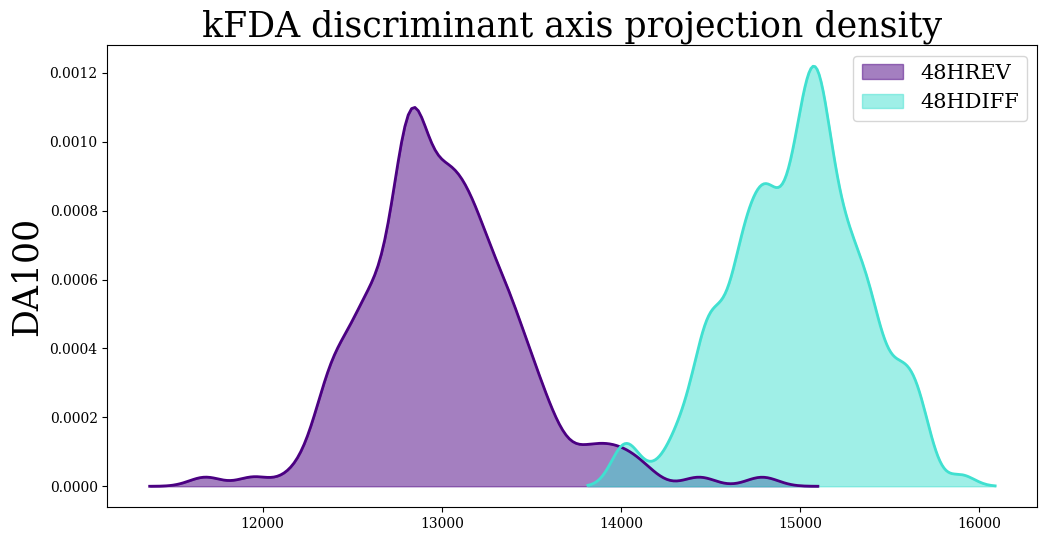

In [6]:
kt_1.plot_density()

Method `scatter_projection` allows to visualize projection scatters, with plot axes representing either kFDA discriminant axes or the contributions on each eigendirection for each sample:

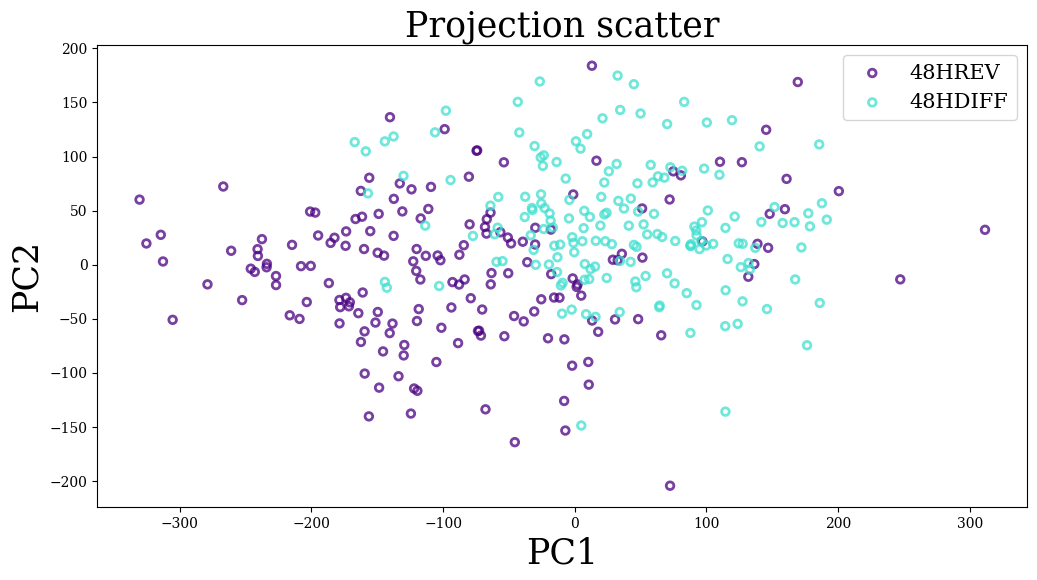

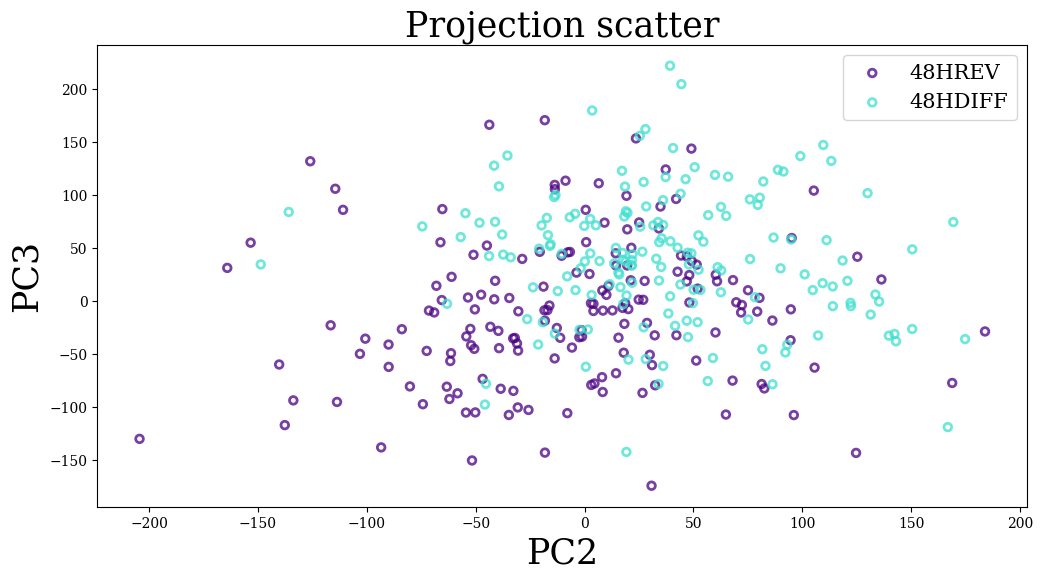

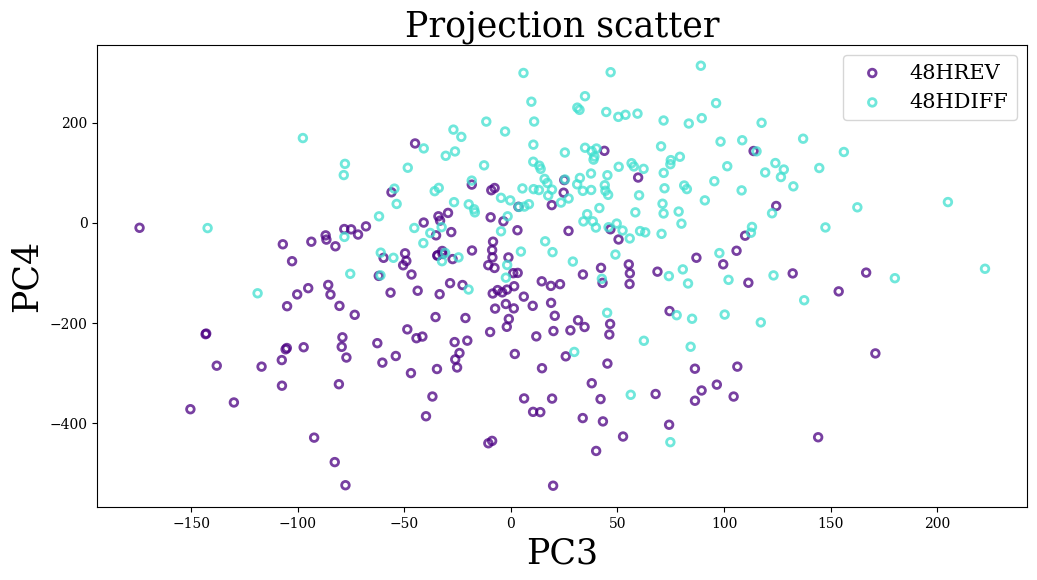

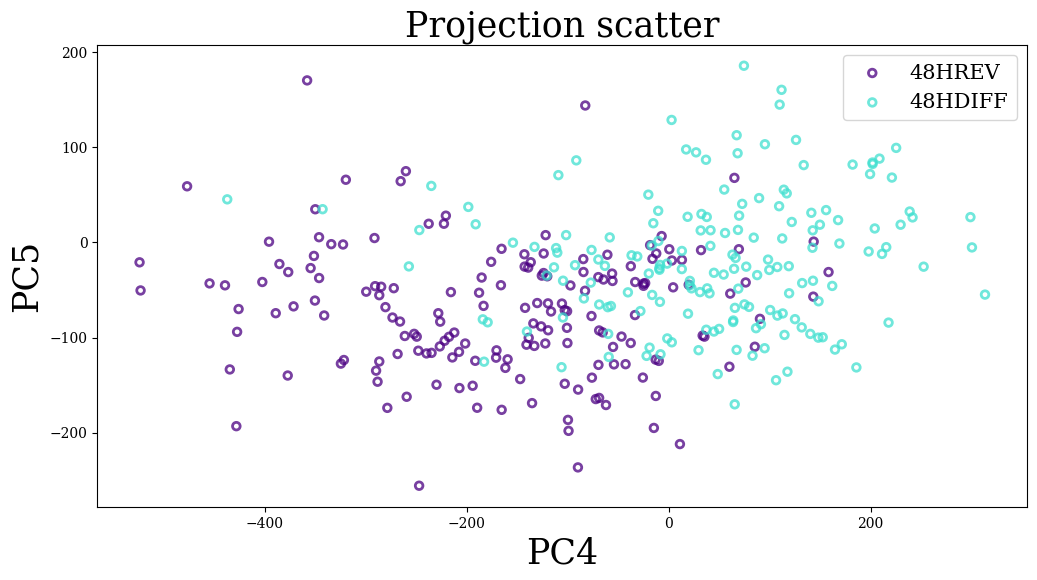

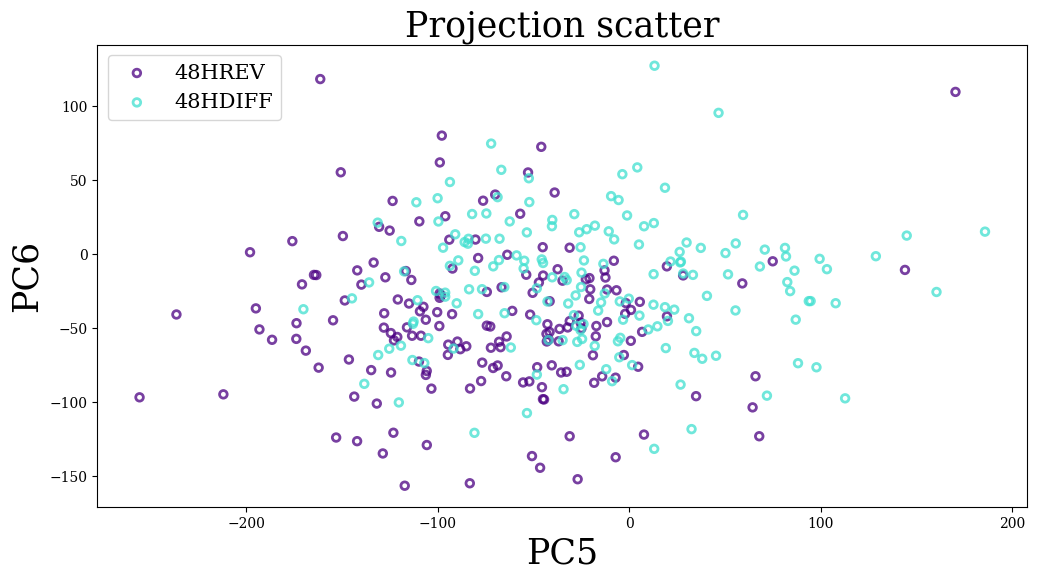

In [7]:
for t in range(1, 6):
    kt_1.scatter_projection(t_x=t, t_y=t+1, proj_xy=['kfda_contrib', 'kfda_contrib'])

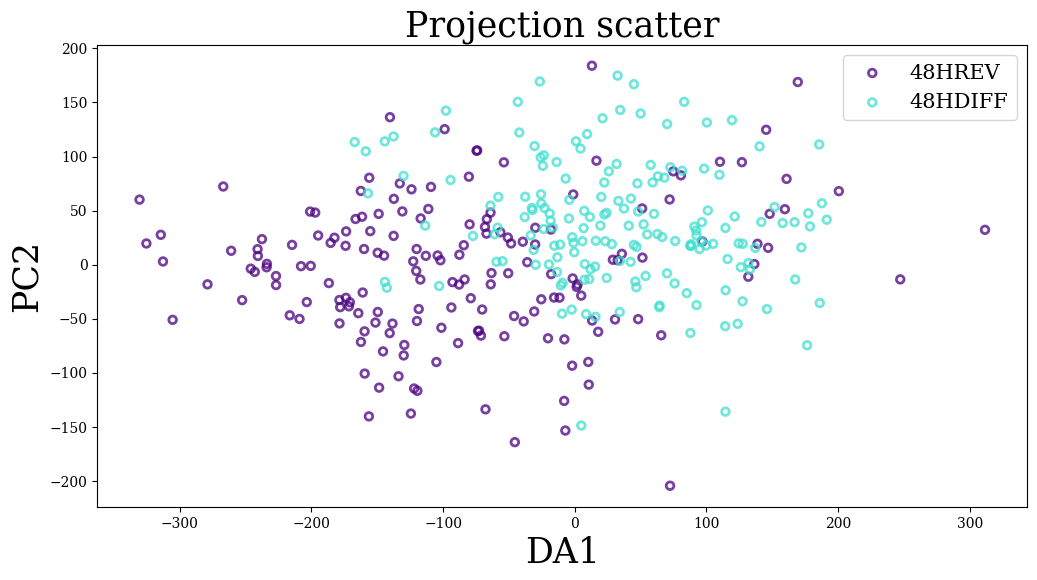

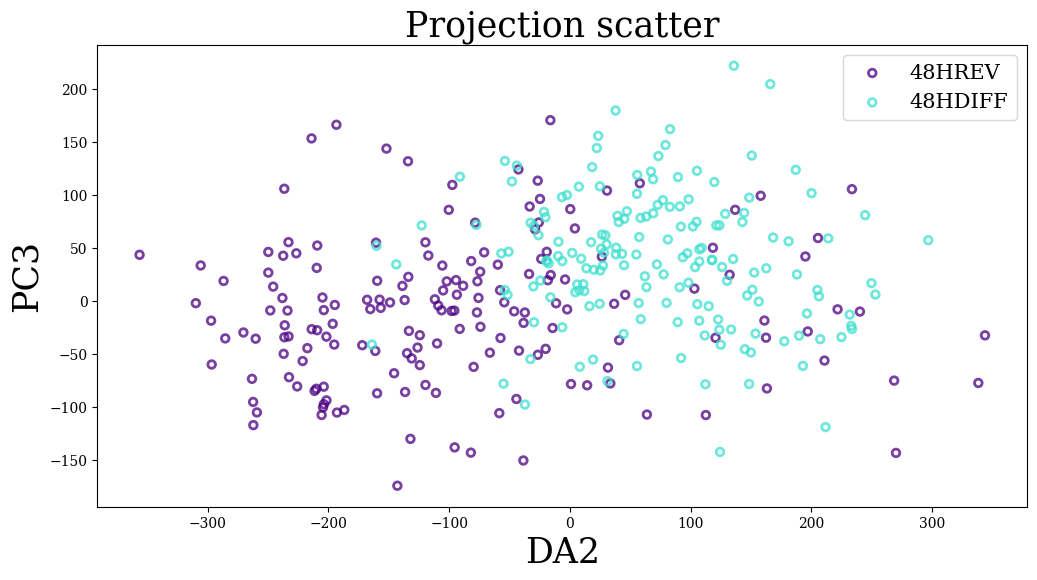

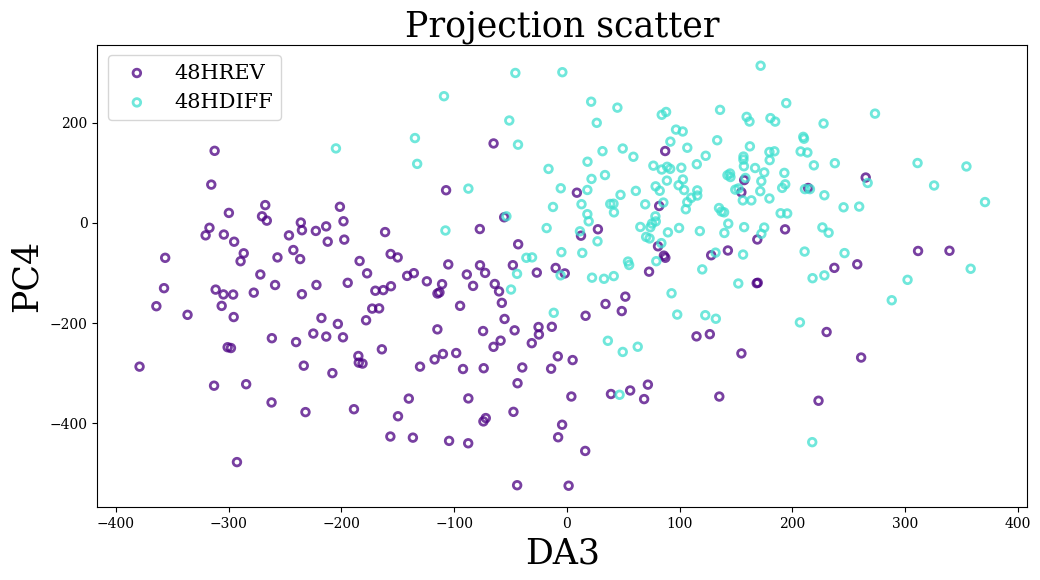

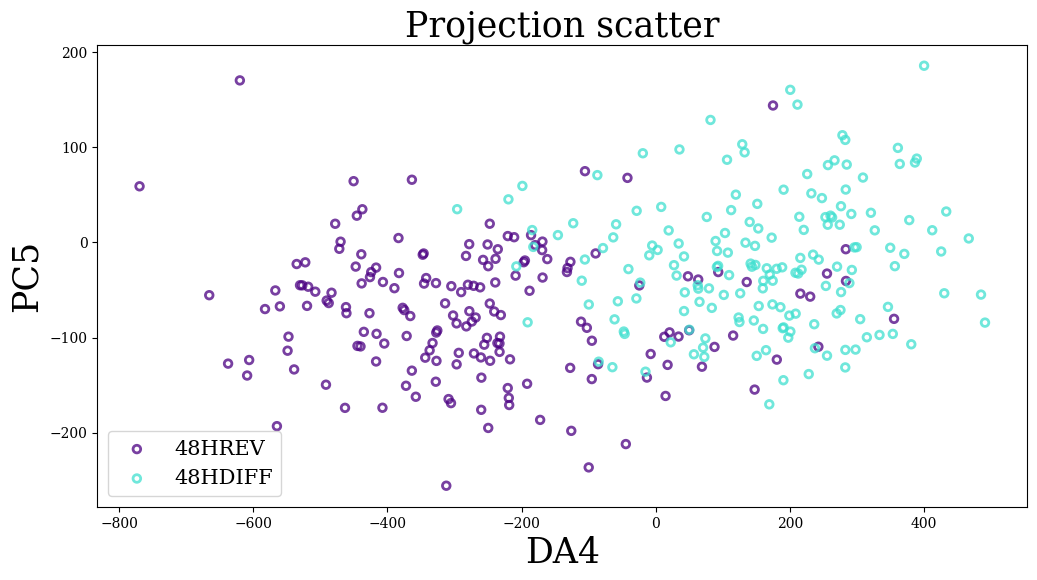

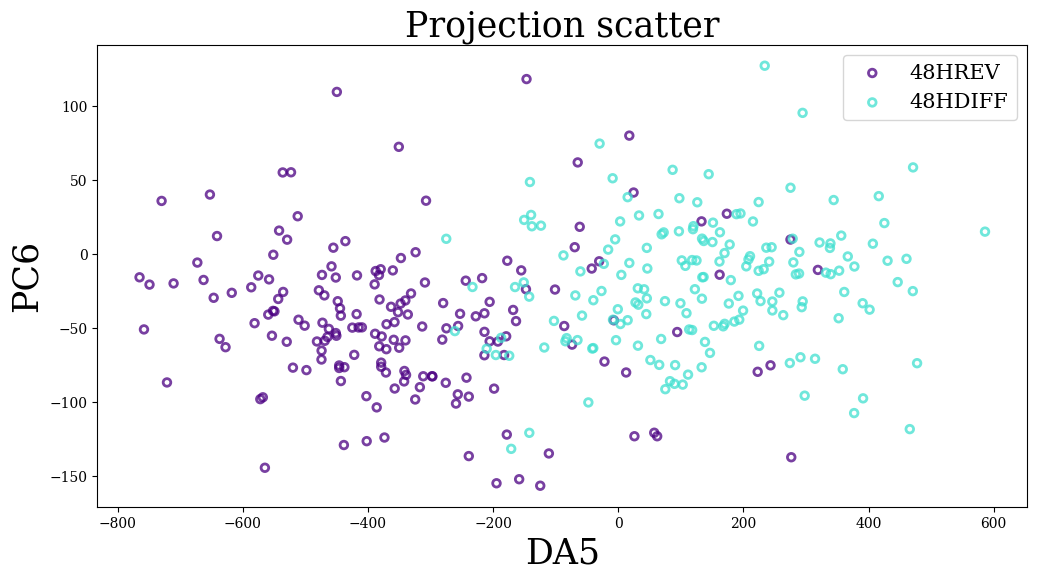

In [8]:
for t in range(1, 6):
    kt_1.scatter_projection(t_x=t, proj_xy=['kfda', 'kfda_contrib'])